# **Training Code**

In [ ]:
# !unzip /content/HAM10000_images_part_1.zip

# Importing Libraries

In [ ]:
# !unzip /content/HAM10000_images_part_2.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Đường dẫn đến file zip (ví dụ nằm trong MyDrive)
zip_path = '/content/drive/MyDrive/HAM10000/HAM10000_images_part_1.zip'

# Thư mục giải nén ra
extract_path = '/content/drive/MyDrive/dataset1/'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("OK")


OK


In [ ]:
# Đường dẫn đến file zip (ví dụ nằm trong MyDrive)
zip_path = '/content/drive/MyDrive/HAM10000/HAM10000_images_part_2.zip'

# Thư mục giải nén ra
extract_path = '/content/drive/MyDrive/dataset/'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Giải nén xong!")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

# Importing Tabular Data (Metadata)

In [ ]:
# tabular_data = pd.read_csv('/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv')
tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')
print(tabular_data.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


<ipython-input-49-01bbab67e74e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_counts.index, y=data_counts.values, palette='viridis')


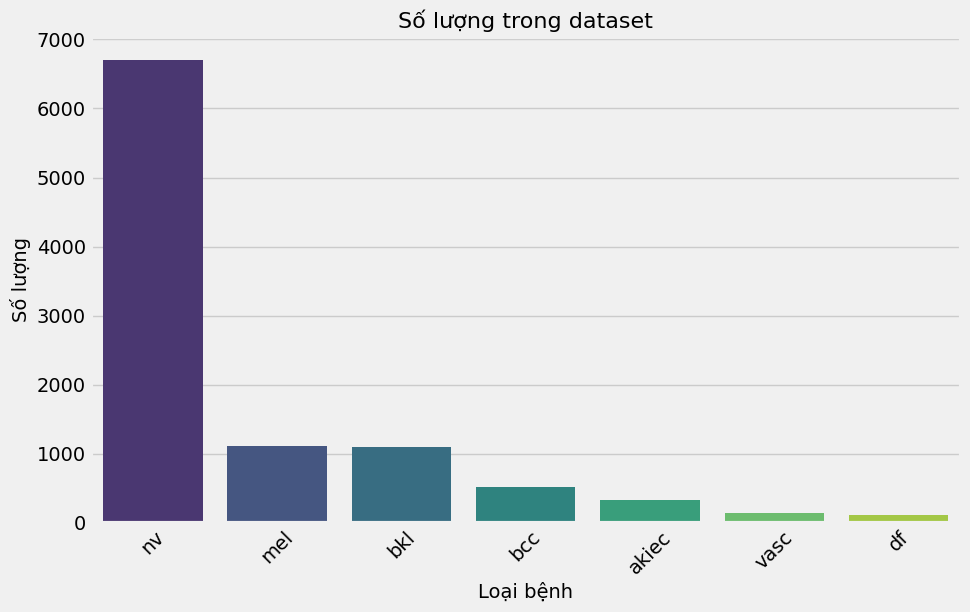

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Đọc file CSV
# tabular_data = pd.read_csv('/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv')

# part1_folder = '/content/drive/MyDrive/dataset/HAM10000_images_part_1'
# part2_folder = '/content/drive/MyDrive/dataset/HAM10000_images_part_2'

tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')

part1_folder = '/content/HAM10000_images_part_1'
part2_folder = '/content/HAM10000_images_part_2'

# Lựa chọn một cột (ví dụ: 'dx' - chẩn đoán bệnh)
column_to_plot = 'dx'

# Đếm số lượng mỗi loại trong cột
data_counts = tabular_data[column_to_plot].value_counts()

######
def get_image_path(image_id):
    if os.path.exists(os.path.join(part1_folder, f"{image_id}.jpg")):
        return os.path.join(part1_folder, f"{image_id}.jpg")
    elif os.path.exists(os.path.join(part2_folder, f"{image_id}.jpg")):
        return os.path.join(part2_folder, f"{image_id}.jpg")
    else:
        return None

tabular_data['image_path'] = tabular_data['image_id'].apply(get_image_path)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=data_counts.index, y=data_counts.values, palette='viridis')
plt.title(f'Số lượng trong dataset', fontsize=16)
plt.xlabel('Loại bệnh', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45)
plt.show()

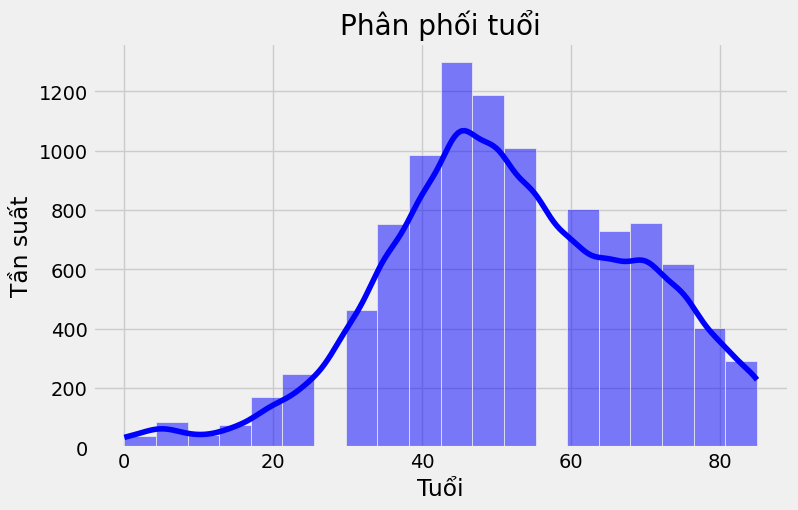

In [ ]:
age_counts = tabular_data['age']

plt.figure(figsize=(8, 5))
sns.histplot(x=age_counts.values, bins=20, kde=True, color='blue')
plt.title('Phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

<ipython-input-51-30ae30bb81d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tabular_data, x='dx', y='age', palette='Set2')


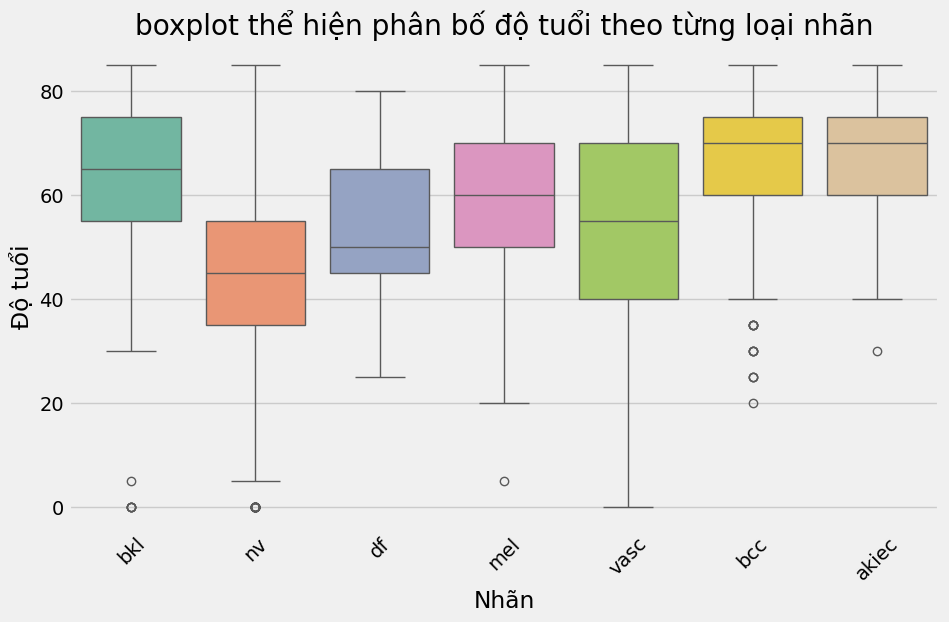

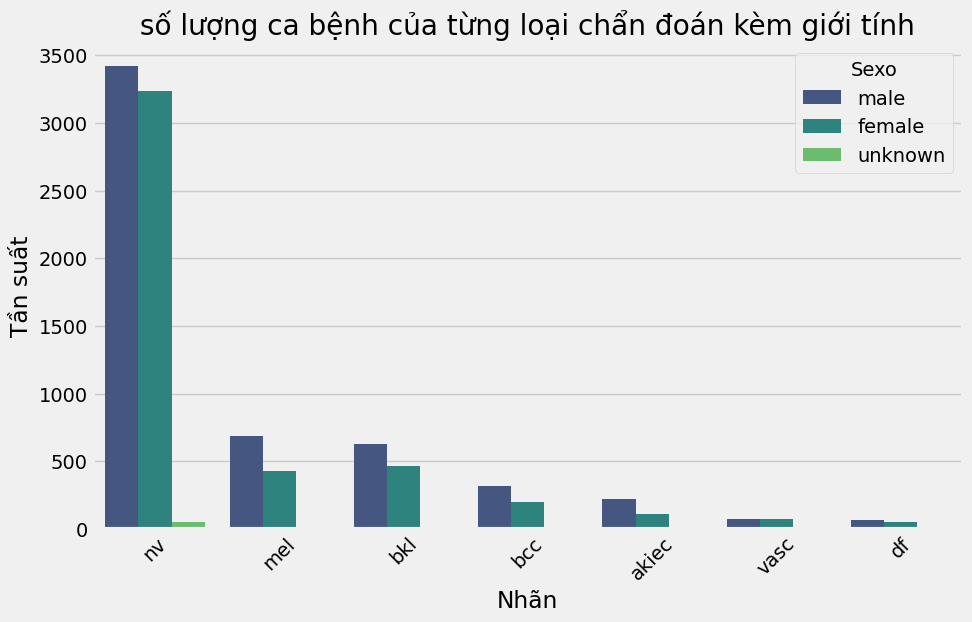

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tabular_data, x='dx', y='age', palette='Set2')
plt.title('boxplot thể hiện phân bố độ tuổi theo từng loại nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Độ tuổi')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=tabular_data, x='dx', hue='sex', palette='viridis', order=tabular_data['dx'].value_counts().index)
plt.title(' số lượng ca bệnh của từng loại chẩn đoán kèm giới tính ')
plt.xlabel('Nhãn')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

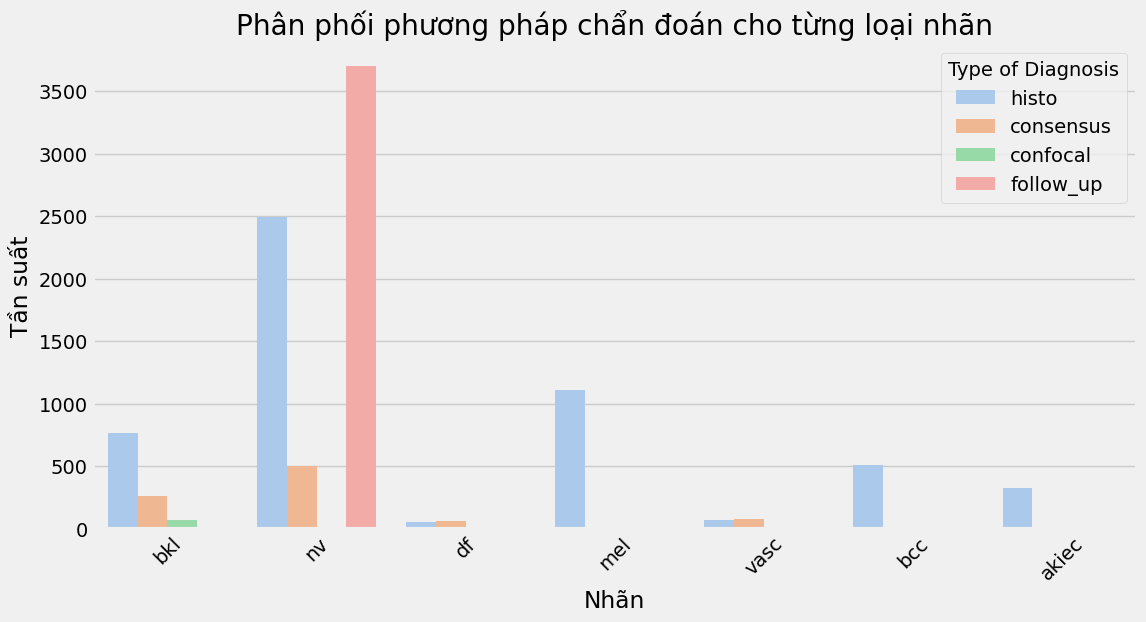

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=tabular_data, x='dx', hue='dx_type', palette='pastel')
plt.title('Phân phối phương pháp chẩn đoán cho từng loại nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)
plt.legend(title='Type of Diagnosis')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tabular_data['dx_encoded'] = le.fit_transform(tabular_data['dx'])
print("Coded diagnostic labels:", dict(zip(le.classes_, le.transform(le.classes_))))

Coded diagnostic labels: {'akiec': np.int64(0), 'bcc': np.int64(1), 'bkl': np.int64(2), 'df': np.int64(3), 'mel': np.int64(4), 'nv': np.int64(5), 'vasc': np.int64(6)}


In [ ]:
class_counts = tabular_data['dx'].value_counts(normalize=True)
print("Class distribution (proportion):")
print(class_counts)

Class distribution (proportion):
dx
nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: proportion, dtype: float64


Examples of images for the class: bkl


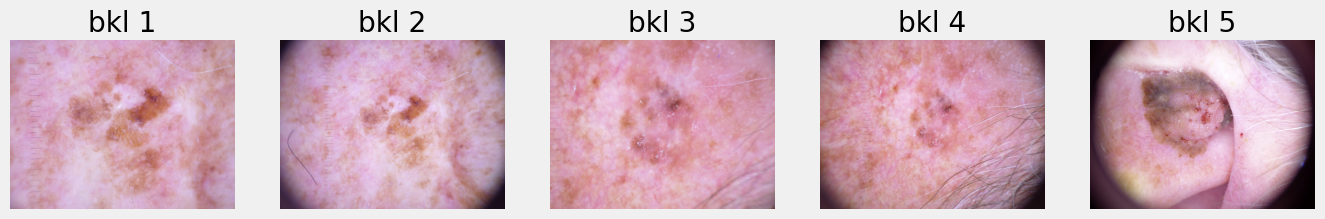

Examples of images for the class: nv


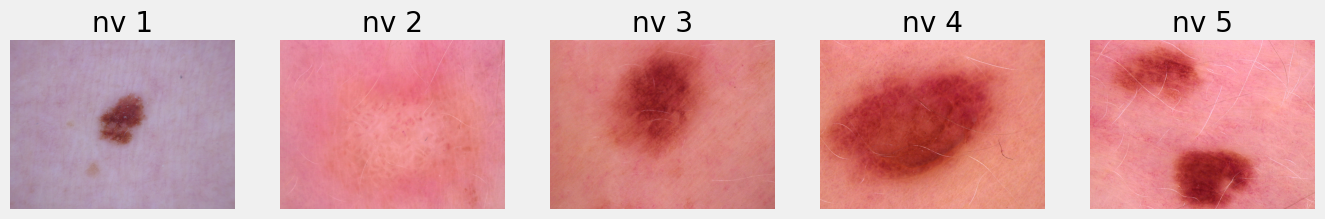

Examples of images for the class: df


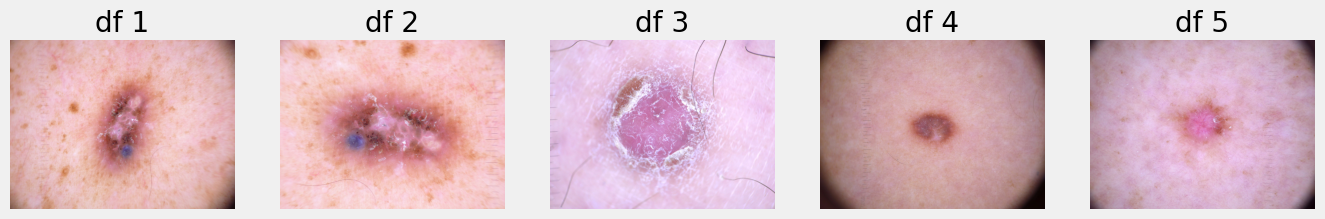

Examples of images for the class: mel


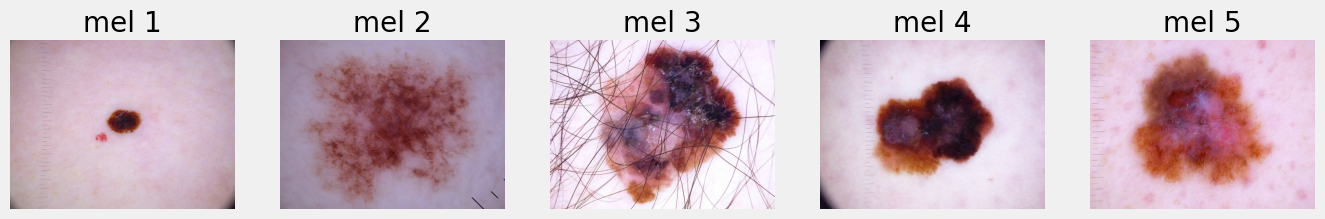

Examples of images for the class: vasc


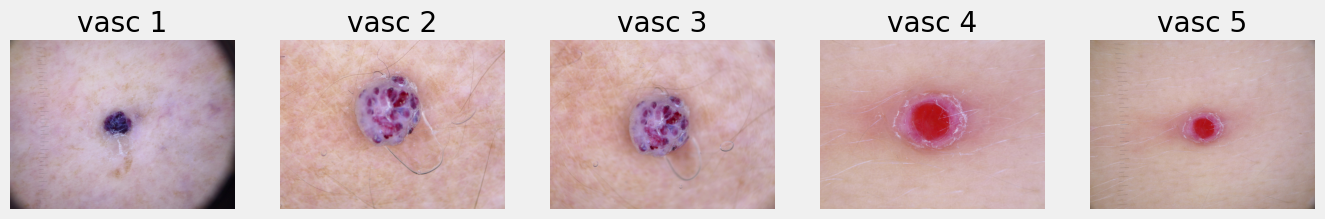

Examples of images for the class: bcc


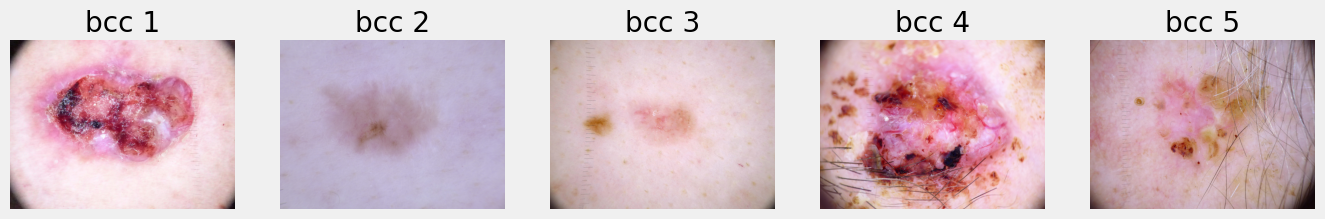

Examples of images for the class: akiec


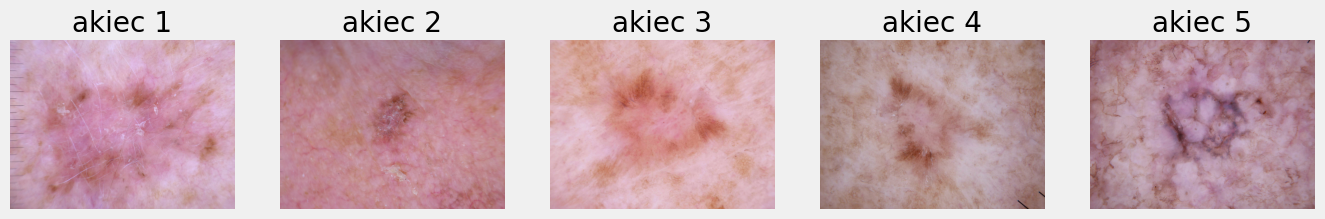

In [ ]:
import cv2
import os

def show_images_by_class(metadata, class_name, num_images=5):
    class_images = tabular_data[tabular_data['dx'] == class_name]['image_path'].dropna().tolist()
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(class_images[:num_images]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name} {i+1}")
        plt.axis('off')
    plt.show()

for class_name in tabular_data['dx'].unique():
    print(f"Examples of images for the class: {class_name}")
    show_images_by_class(tabular_data, class_name)

<ipython-input-56-93e1139a49ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
<ipython-input-56-93e1139a49ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
<ipython-input-56-93e1139a49ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


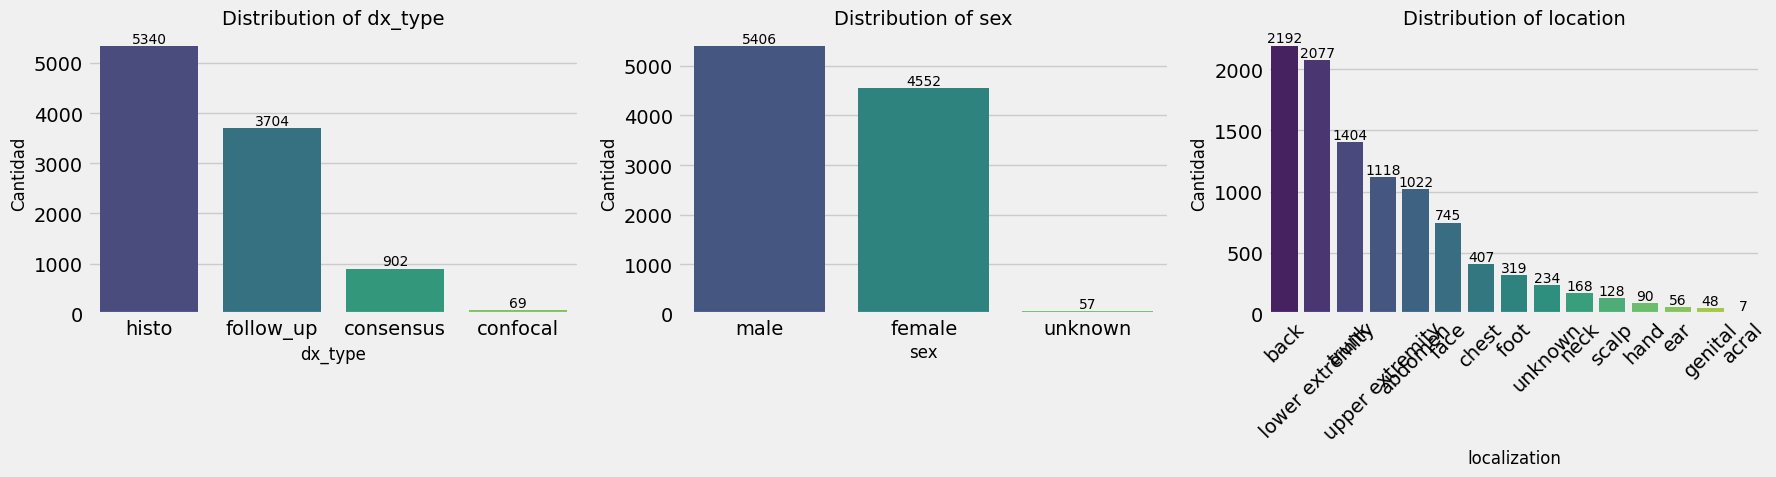

In [ ]:
def plot_distributions(df):
    columns_to_plot = ['dx_type', 'sex', 'localization']
    titles = ['Distribution of dx_type', 'Distribution of sex', 'Distribution of location']

    plt.figure(figsize=(18, 5))

    for i, col in enumerate(columns_to_plot):
        plt.subplot(1, 3, i + 1)
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
        plt.title(titles[i], fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Cantidad", fontsize=12)
        plt.xticks(rotation=45 if col == 'localization' else 0)
        for j, val in enumerate(value_counts.values):
            plt.text(j, val + 2, str(val), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_distributions(pd.read_csv('/content/HAM10000_metadata.csv'))

<ipython-input-57-1a769cf5d51c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dx_type_counts.index, y=dx_type_counts.values, palette="coolwarm")


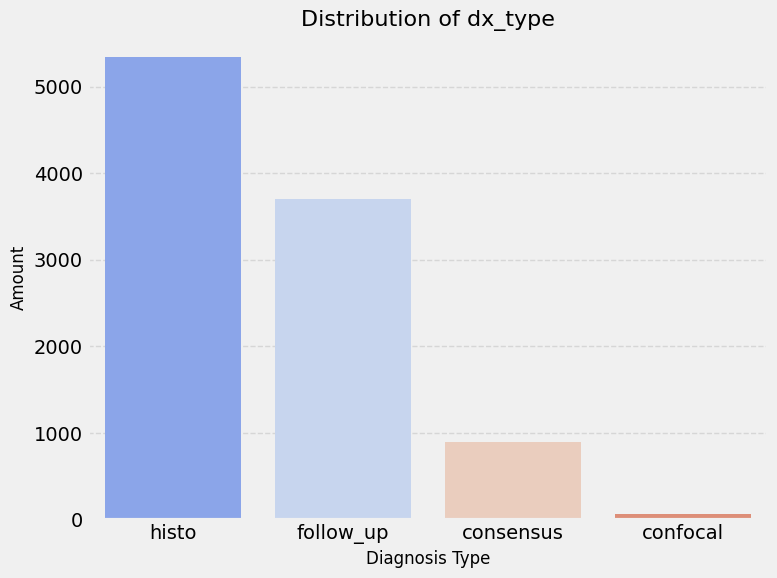

In [ ]:
def plot_dx_type_distribution(df):
    dx_type_counts = df['dx_type'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=dx_type_counts.index, y=dx_type_counts.values, palette="coolwarm")
    plt.title("Distribution of dx_type", fontsize=16)
    plt.xlabel("Diagnosis Type", fontsize=12)
    plt.ylabel("Amount", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_dx_type_distribution(tabular_data)

<ipython-input-58-a8d1dfbf2580>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index.astype(int), y=age_counts.values, palette="Set2")


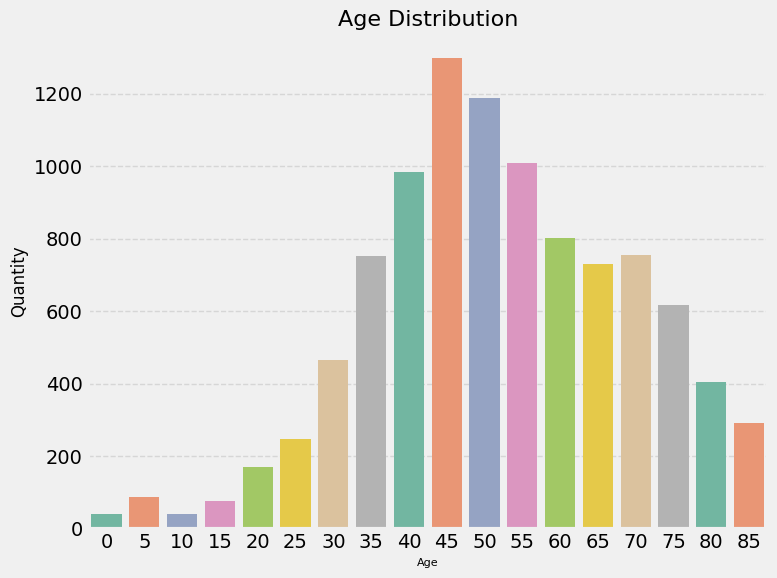

In [ ]:
def plot_age_distribution(df):
    age_counts = df['age'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=age_counts.index.astype(int), y=age_counts.values, palette="Set2")
    plt.title("Age Distribution", fontsize=16)
    plt.xlabel("Age", fontsize=8)
    plt.ylabel("Quantity", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_age_distribution(tabular_data)

<ipython-input-59-c03cd9ab6e47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=localization_counts.index, y=localization_counts.values, palette="viridis")


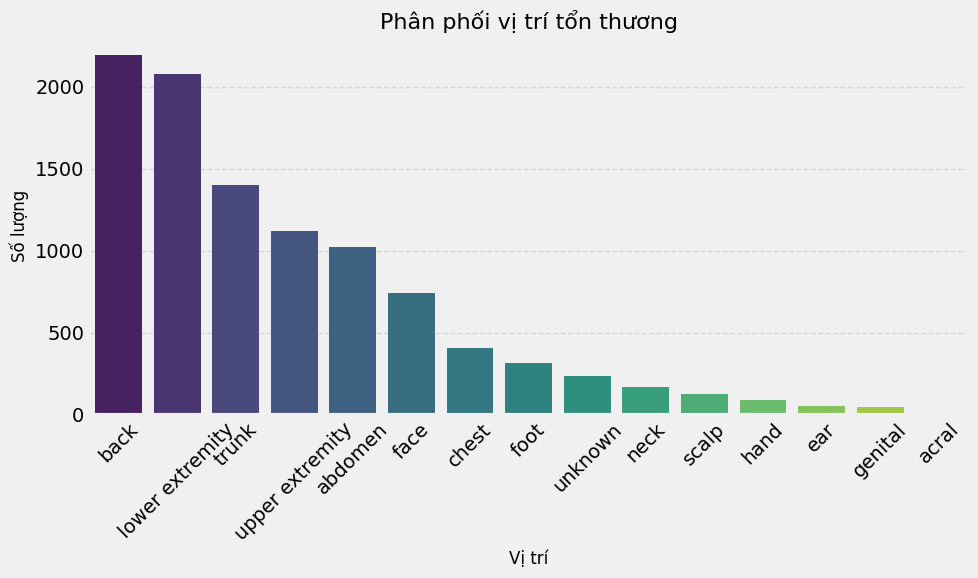

In [ ]:
def plot_localization_distribution(df):
    localization_counts = df['localization'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=localization_counts.index, y=localization_counts.values, palette="viridis")
    plt.title("Phân phối vị trí tổn thương", fontsize=16)
    plt.xlabel("Vị trí", fontsize=12)
    plt.ylabel("Số lượng", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_localization_distribution(tabular_data)

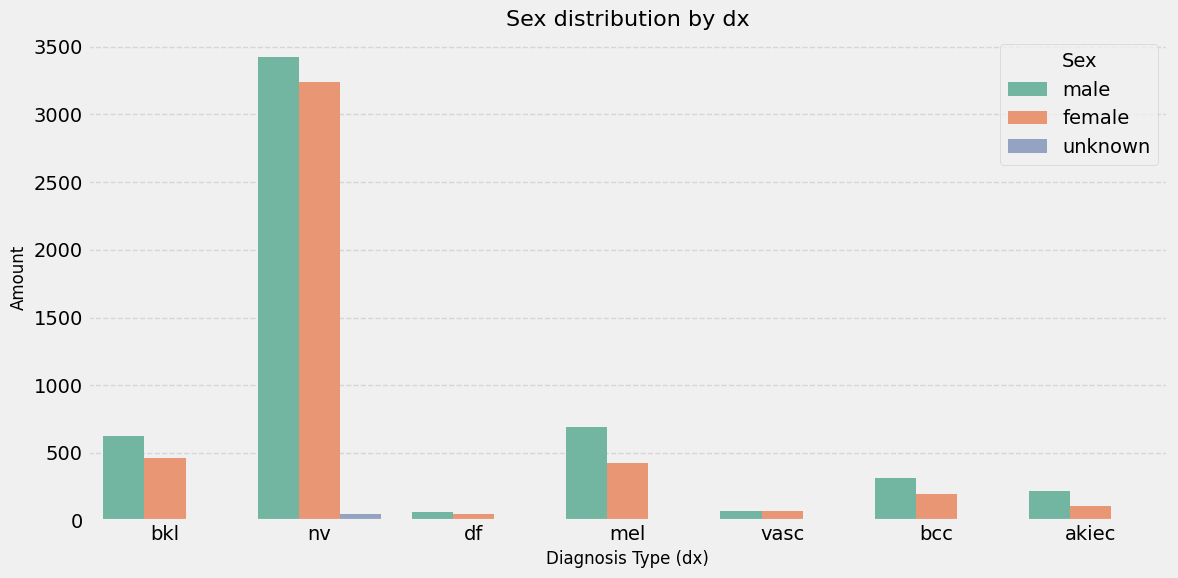

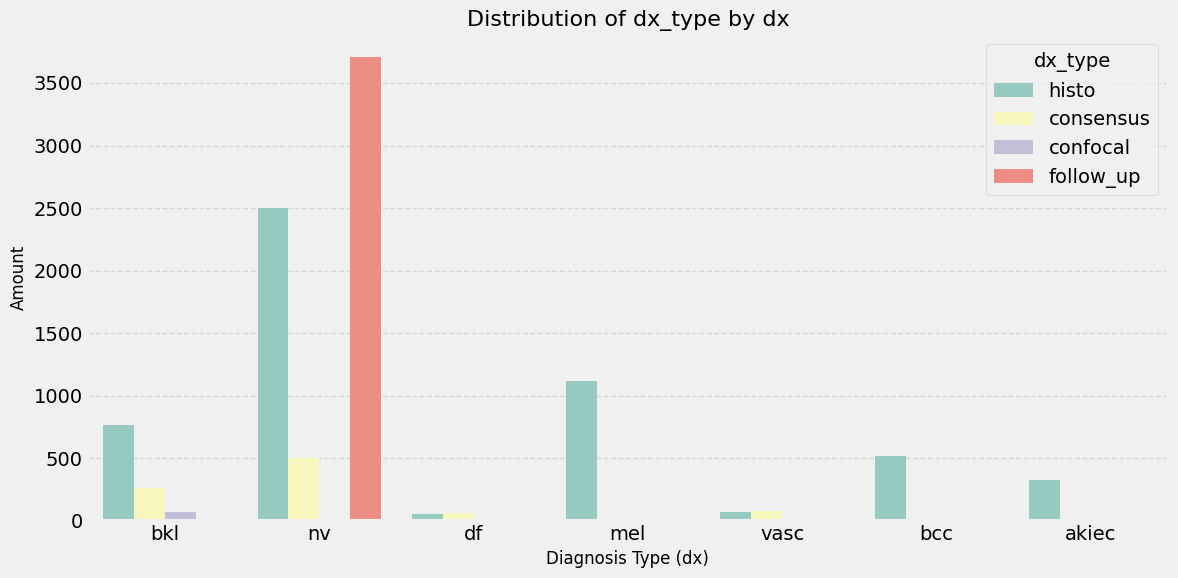

In [ ]:
def plot_sex_and_dx_type_by_dx(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='dx', hue='sex', palette='Set2')
    plt.title("Sex distribution by dx", fontsize=16)
    plt.xlabel("Diagnosis Type (dx)", fontsize=12)
    plt.ylabel("Amount", fontsize=12)
    plt.legend(title="Sex", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='dx', hue='dx_type', palette='Set3')
    plt.title("Distribution of dx_type by dx", fontsize=16)
    plt.xlabel("Diagnosis Type (dx)", fontsize=12)
    plt.ylabel("Amount", fontsize=12)
    plt.legend(title="dx_type", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_sex_and_dx_type_by_dx(tabular_data)

<ipython-input-61-3d3b23fab088>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx', y='age', palette='coolwarm')


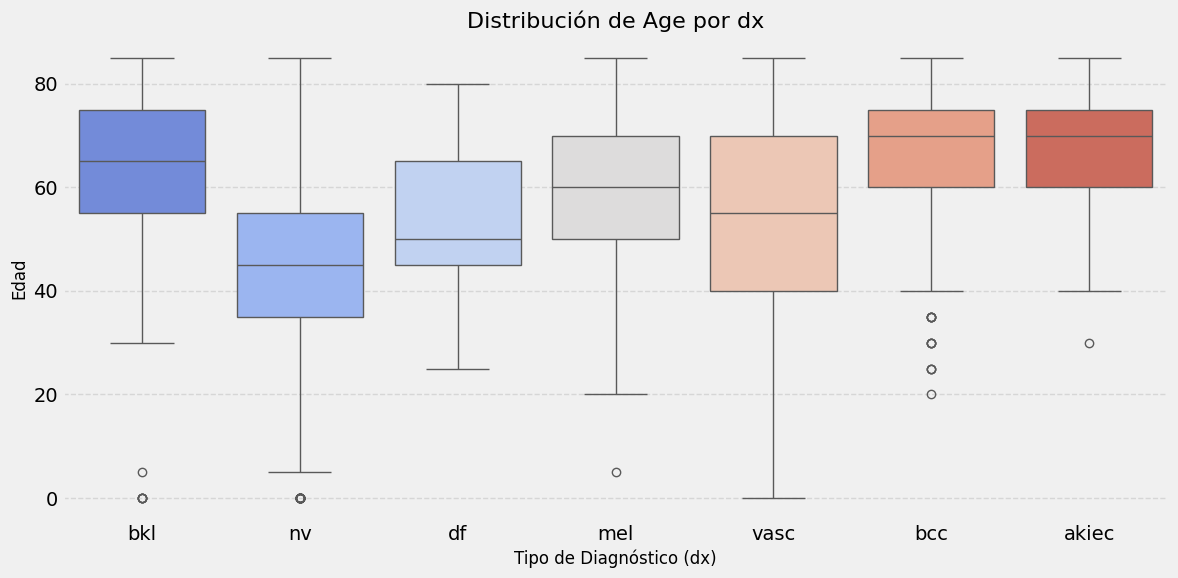

In [ ]:
def plot_age_and_dx_type_by_dx(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='dx', y='age', palette='coolwarm')
    plt.title("Distribución de Age por dx", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Edad", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_age_and_dx_type_by_dx(tabular_data)

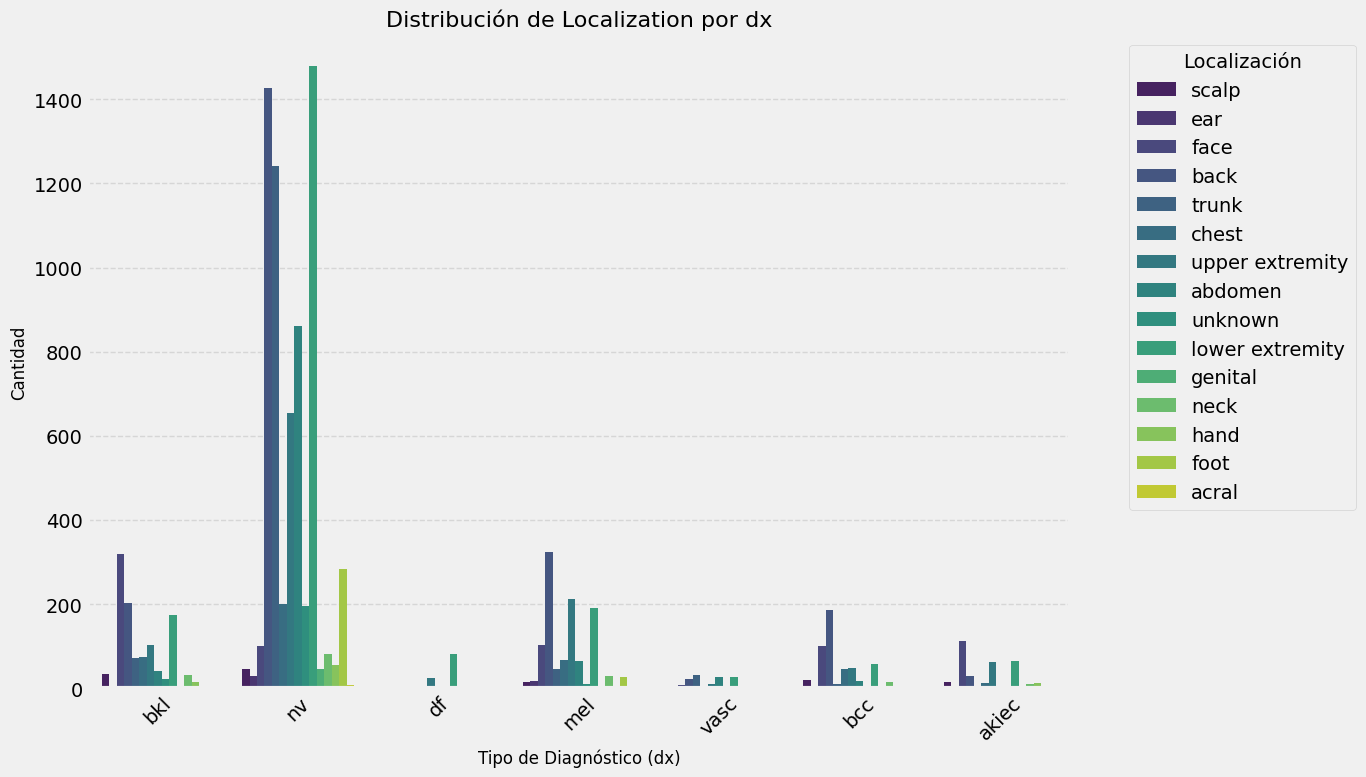

In [ ]:
def plot_localization_and_dx_type_by_dx(df):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='dx', hue='localization', palette='viridis')
    plt.title("Distribución de Localization por dx", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Cantidad", fontsize=12)
    plt.legend(title="Localización", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_localization_and_dx_type_by_dx(tabular_data)

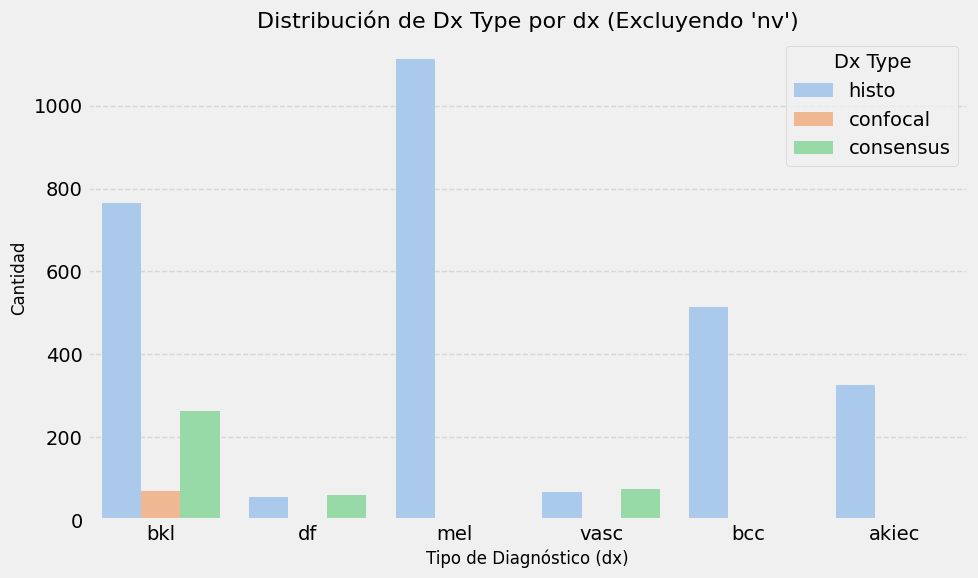

<ipython-input-63-d8cdf9bccd62>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx', y='age', palette='coolwarm')


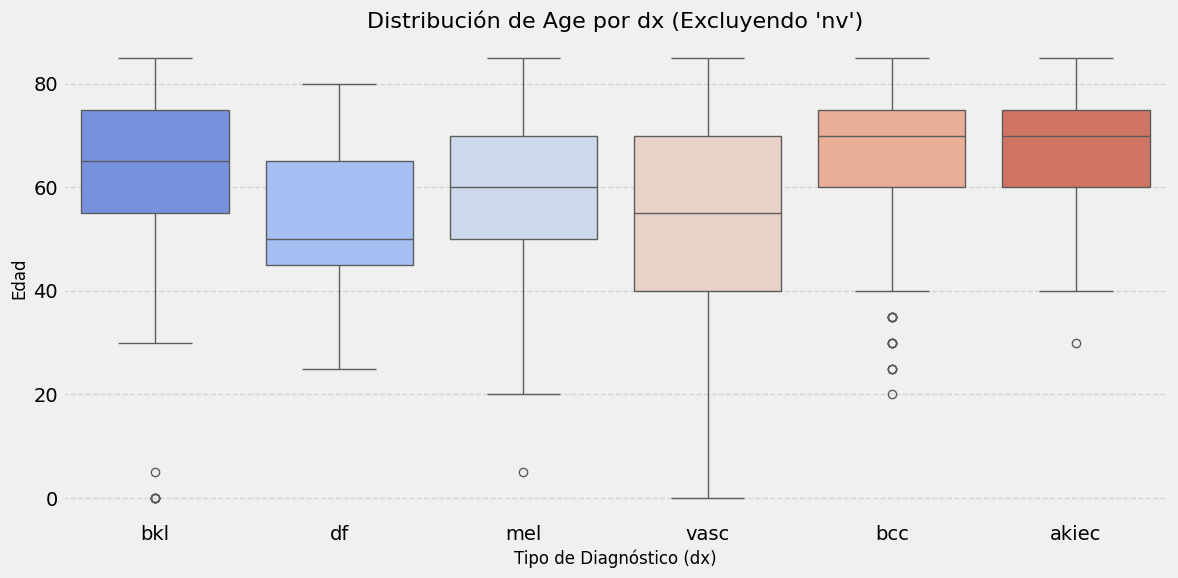

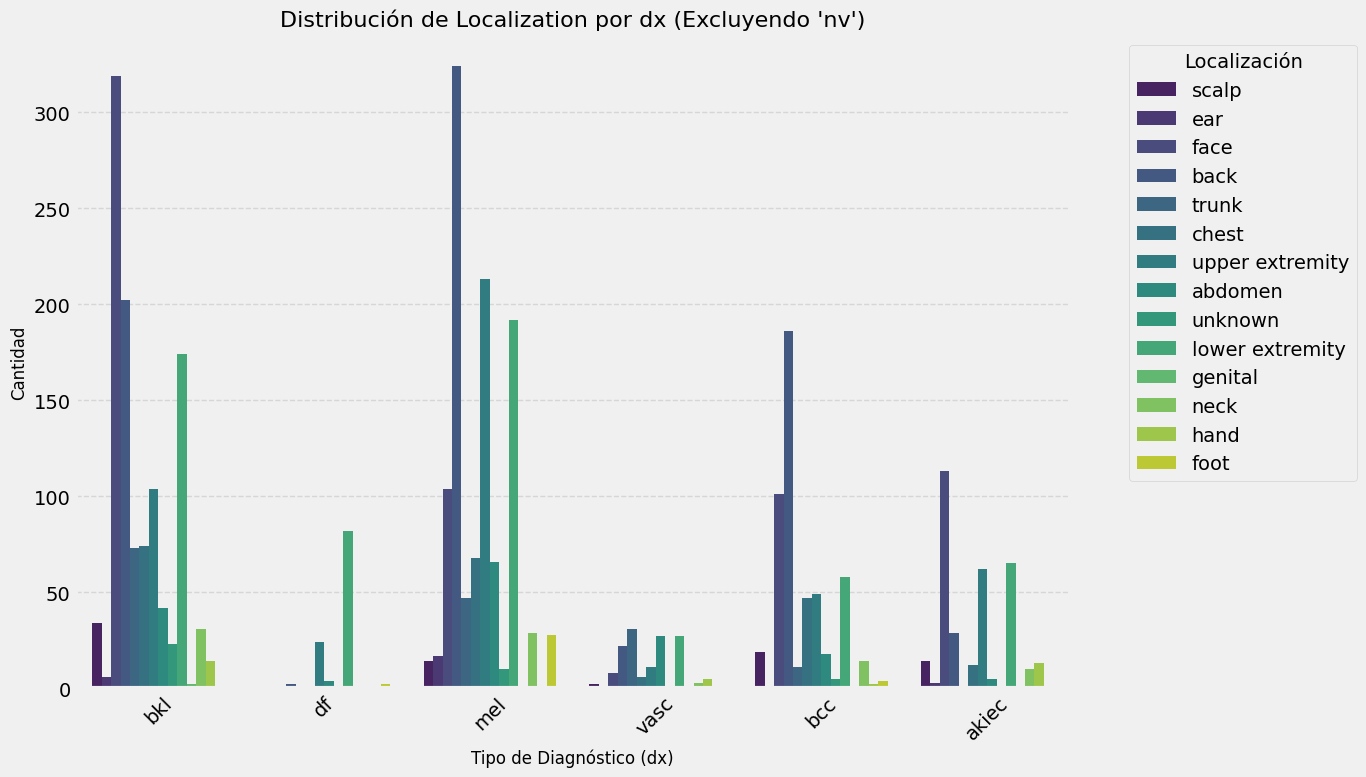

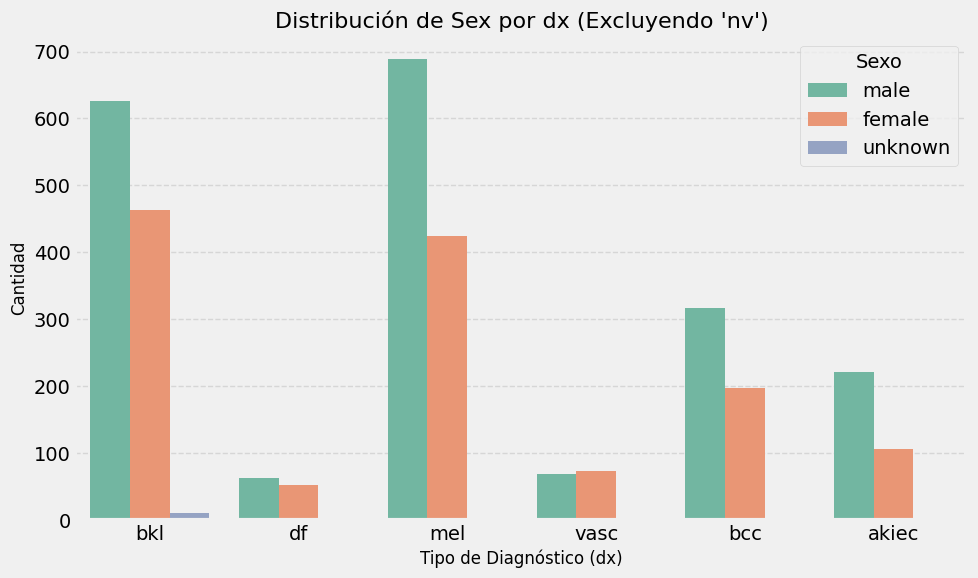

In [ ]:
df_filtered = tabular_data[tabular_data['dx'] != 'nv']
def plot_sex_by_dx_filtered(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='dx', hue='sex', palette='Set2')
    plt.title("Distribución de Sex por dx (Excluyendo 'nv')", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Cantidad", fontsize=12)
    plt.legend(title="Sexo", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_localization_by_dx_filtered(df):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='dx', hue='localization', palette='viridis')
    plt.title("Distribución de Localization por dx (Excluyendo 'nv')", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Cantidad", fontsize=12)
    plt.legend(title="Localización", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_age_by_dx_filtered(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='dx', y='age', palette='coolwarm')
    plt.title("Distribución de Age por dx (Excluyendo 'nv')", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Edad", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
def plot_dx_type_by_dx_filtered(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='dx', hue='dx_type', palette='pastel')
    plt.title("Distribución de Dx Type por dx (Excluyendo 'nv')", fontsize=16)
    plt.xlabel("Tipo de Diagnóstico (dx)", fontsize=12)
    plt.ylabel("Cantidad", fontsize=12)
    plt.legend(title="Dx Type", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_dx_type_by_dx_filtered(df_filtered)
plot_age_by_dx_filtered(df_filtered)
plot_localization_by_dx_filtered(df_filtered)
plot_sex_by_dx_filtered(df_filtered)

# Importing Image Data with Pixel Values and Labels

In [ ]:
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')

# Splitting data into features (x) and labels (y)

In [ ]:
x = data.drop('label', axis=1)
y = data['label']

# Oversampling to Overcome Class Imbalance

In [ ]:
oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x, y)

# Reshaping x to match image dimensions

In [ ]:
x_resampled = np.array(x_resampled).reshape(-1, 28, 28, 3)

print('Shape of x after oversampling and reshaping:', x_resampled.shape)

Shape of x after oversampling and reshaping: (46935, 28, 28, 3)


# Standardizing Data

In [ ]:
mean = np.mean(x_resampled)
std = np.std(x_resampled)
x_resampled = (x_resampled - mean) / std

# Splitting Data into Training and Testing Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=1
)

print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


# Building the CNN Model

In [ ]:
# model = Sequential([
#     Input(shape=(28, 28, 3)),  # Adjusted input shape to match data
#     Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(32, kernel_size=(3, 3), activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),
#     Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     MaxPool2D(pool_size=(2, 2), padding='same'),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(7, activation='softmax')
# ])

# model.summary()

In [ ]:
model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,863 (351.03 KB)

 Trainable params: 89,863 (351.03 KB)

 Non-trainable params: 0 (0.00 B)

# Callback to save the best model

In [ ]:
# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss for early stopping
    patience=8,                 # Number of epochs to wait for improvement
    restore_best_weights=True   # Restore the model weights from the best epoch
)

# ModelCheckpoint callback to save the model with the best validation loss
model_checkpoint = ModelCheckpoint(
    'best_model.keras',          # Filepath to save the best model
    monitor='val_loss',          # Monitor the validation loss metric
    save_best_only=True,         # Save only the best model based on validation loss
    save_weights_only=False      # Save the entire model (architecture + weights)
)
# List of callbacks to pass to the model during training
callbacks = [early_stopping , model_checkpoint ]

In [ ]:
# callback = ModelCheckpoint(
#     filepath='best_model.keras',  # Changed to .keras extension
#     monitor='val_accuracy',       # Monitoring validation accuracy
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )

# Compiling the Model

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Training the Model

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=100,
    callbacks=[callbacks]
)

model.save('final_model.h5')
print("Saved 'final_model.h5'")

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3529 - loss: 1.5674 - val_accuracy: 0.6089 - val_loss: 1.0053
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6276 - loss: 0.9657 - val_accuracy: 0.7545 - val_loss: 0.6602
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7504 - loss: 0.6591 - val_accuracy: 0.7880 - val_loss: 0.5452
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8113 - loss: 0.5024 - val_accuracy: 0.8194 - val_loss: 0.4530
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8580 - loss: 0.3819 - val_accuracy: 0.8830 - val_loss: 0.3160
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8820 - loss: 0.3118 - val_accuracy: 0.8862 - val_loss: 0.2960
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9049 - loss: 0.2628 - val_accuracy: 0.9103 - val_loss: 0.2388
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9246 - loss: 0.2119 - val_acc

Saved 'final_model.h5'


In [ ]:
np.save('mean.npy', mean)
np.save('std.npy', std)

# validate loss/acc

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

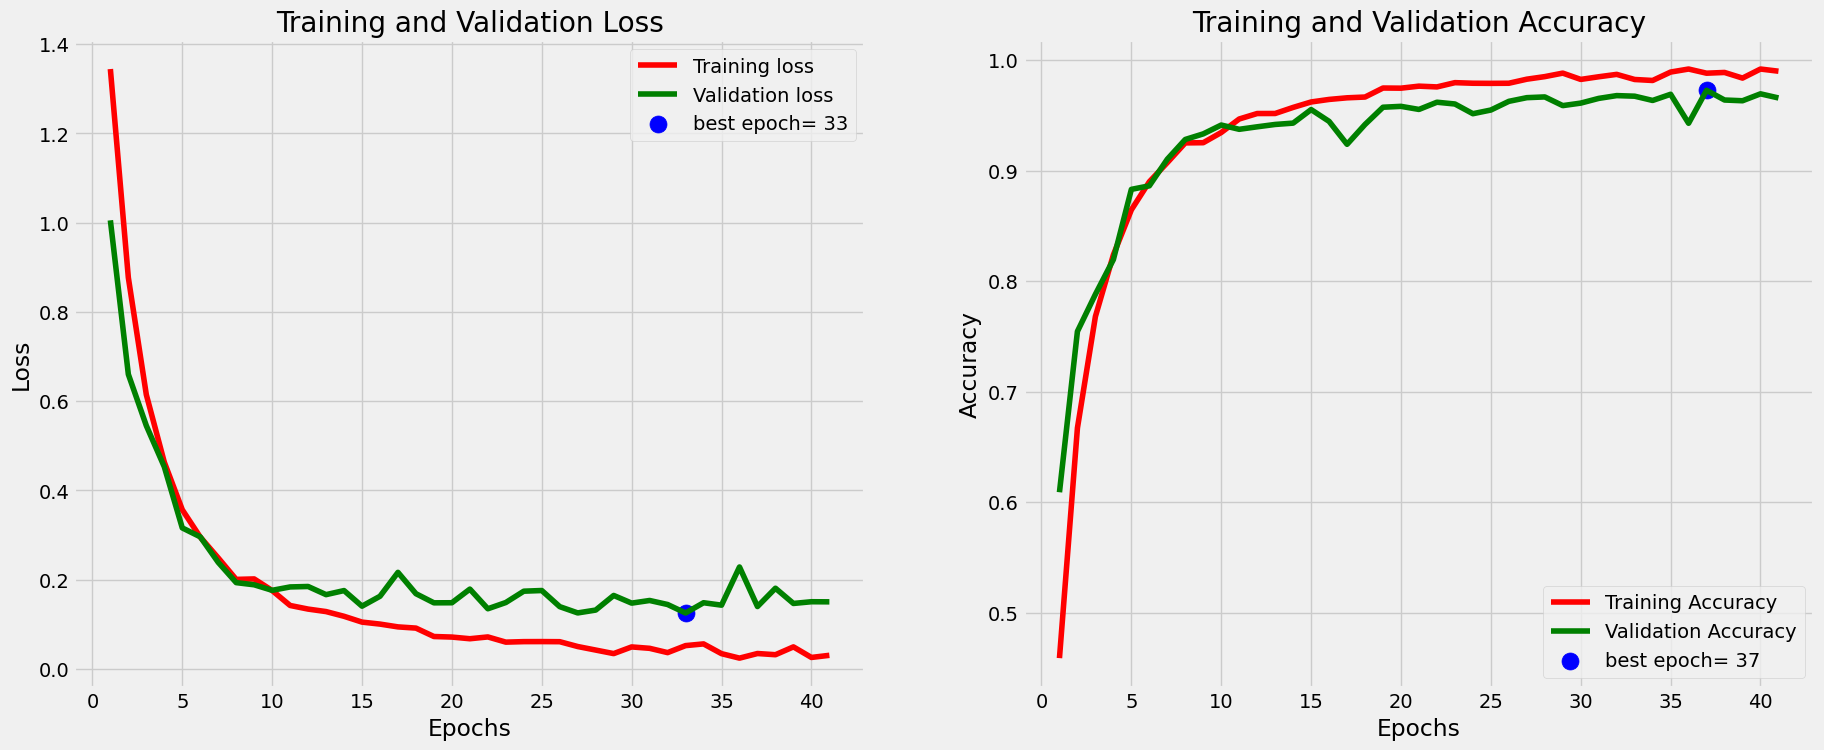

In [ ]:
plot_training(history)

In [ ]:
train_score = model.evaluate(X_train, Y_train, verbose= 1)
test_score = model.evaluate(X_test, Y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0263
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9599 - loss: 0.1513
Train Loss:  0.045016366988420486
Train Accuracy:  0.9858048558235168
--------------------
Test Loss:  0.15665990114212036
Test Accuracy:  0.9623947739601135


In [ ]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

# Kiểm tra xem y_true có phải là một mảng một chiều hay không
if y_true.ndim == 1:
    # Nếu y_true là một mảng một chiều, không cần sử dụng np.argmax
    pass
else:
    y_true = np.argmax(y_true, axis=1)

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


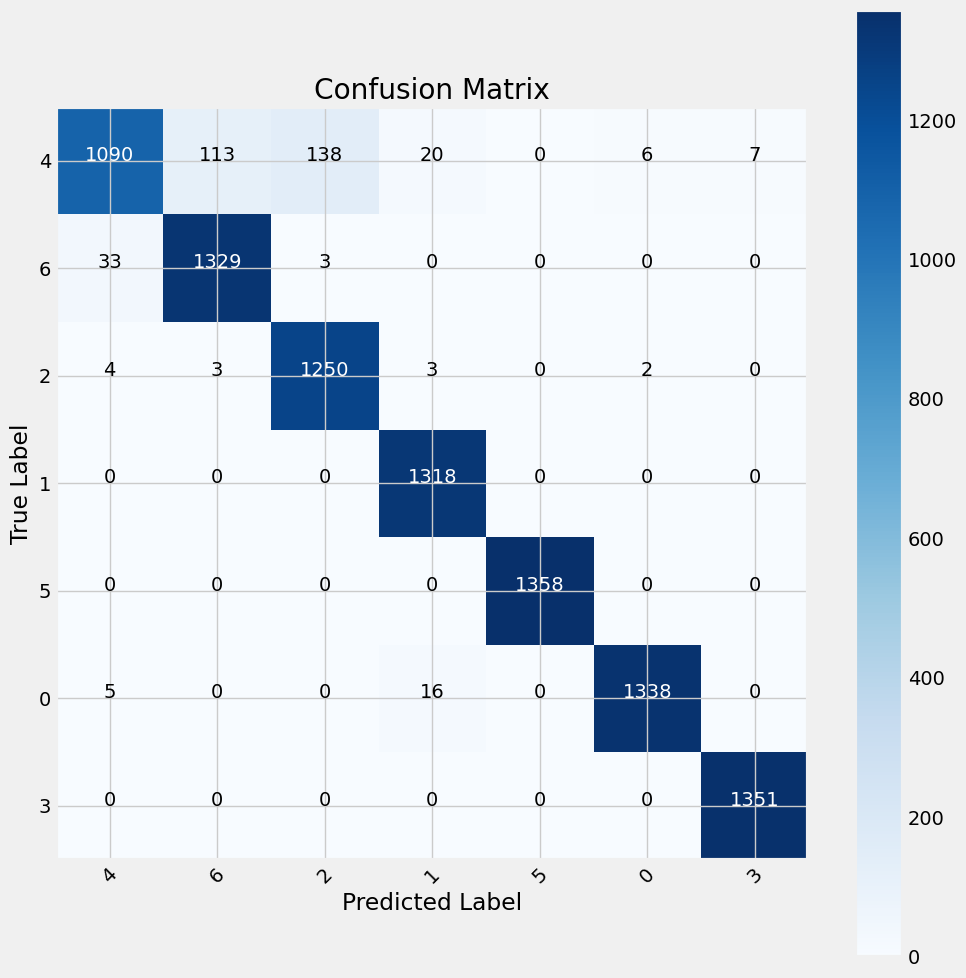

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
class_names = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predicting the classes for X_test
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predicted_classes)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(Y_test, predicted_classes, target_names=class_names))

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on Test Set: 96.24%

Classification Report:
              precision    recall  f1-score   support

          nv       0.99      0.98      0.99      1359
         mel       0.97      1.00      0.99      1318
         bkl       0.90      0.99      0.94      1262
         bcc       0.99      1.00      1.00      1351
       akiec       0.96      0.79      0.87      1374
        vasc       1.00      1.00      1.00      1358
          df       0.92      0.97      0.95      1365

    accuracy                           0.96      9387
   macro avg       0.96      0.96      0.96      9387
weighted avg       0.96      0.96      0.96      9387



Image: ISIC_0028242.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 0.9309
----------------------------------------
Image: ISIC_0025312.jpg
Actual Class: bkl
Predicted Class: bkl
Confidence: 1.0000
----------------------------------------
Image: ISIC_0027925.jpg
Actual Class: nv
Predicted Class: bkl
Confidence: 0.6568
----------------------------------------
Image: ISIC_0027993.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------
Image: ISIC_0028070.jpg
Actual Class: nv
Predicted Class: nv
Confidence: 1.0000
----------------------------------------


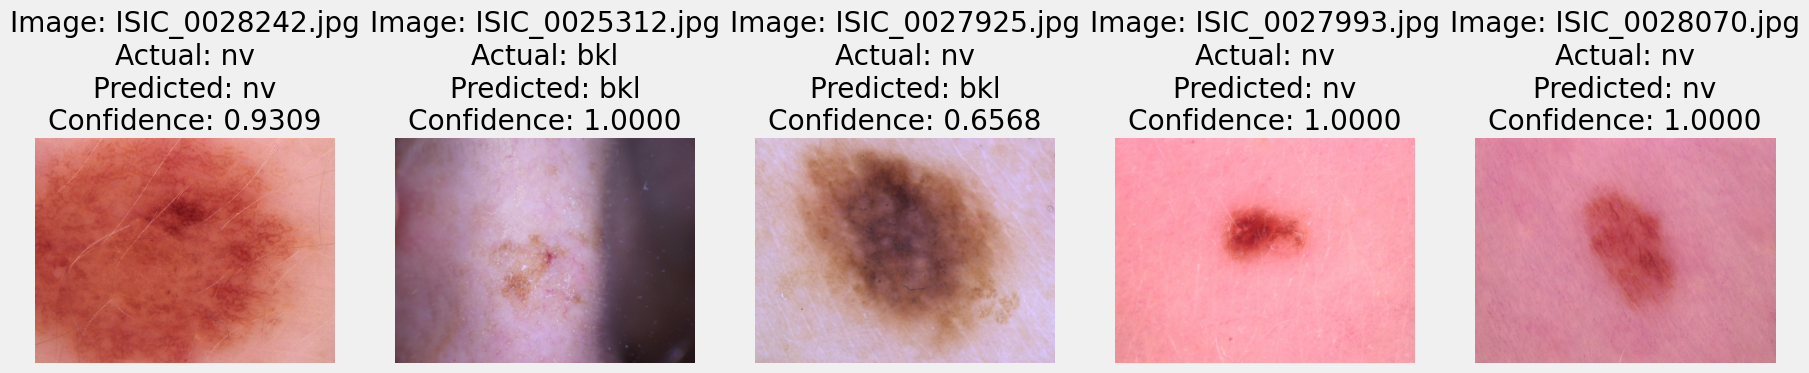

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

label_dict = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'nv',
    5: 'vas',
    6: 'mel'
}
model = tf.keras.models.load_model('final_model.h5')
# Ensure this filename matches your trained model
mean = np.load('mean.npy')
std = np.load('std.npy')
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure image has 3 channels
    image = image.resize((28, 28))  # PIL uses (width, height)
    image = np.asarray(image)
    image = (image - mean) / std  # Standardize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_random_images(image_dir, metadata_path, num_images=5):
    # Lấy danh sách tất cả các tệp tin ảnh trong thư mục
    all_files = [os.path.join(image_dir, file_name) for file_name in os.listdir(image_dir) if file_name.endswith('.jpg') or file_name.endswith('.png')]

    # Chọn ngẫu nhiên num_images tệp tin
    selected_files = np.random.choice(all_files, num_images, replace=False)

    # Tải metadata
    metadata = pd.read_csv(metadata_path)

    # Hiển thị 5 ảnh trong một hình
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))

    for i, file_path in enumerate(selected_files):
        # Lấy tên ảnh
        image_name = os.path.basename(file_path)

        # Lấy lớp thực tế từ metadata
        actual_class = metadata[metadata['image_id'] == image_name.split('.')[0]]['dx'].values[0]

        # Tiền xử lý ảnh
        processed_image = preprocess_image(file_path)

        # Dự đoán
        predictions = model.predict(processed_image, verbose=0)
        confidence = np.max(predictions)

        # Lấy lớp dự đoán và tên lớp
        predicted_class_idx = np.argmax(predictions, axis=1)[0]
        predicted_class_name = label_dict[predicted_class_idx]

        # In kết quả
        print(f"Image: {image_name}")
        print(f"Actual Class: {actual_class}")
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Confidence: {confidence:.4f}")
        print("-" * 40)

        # Hiển thị ảnh
        image = Image.open(file_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {image_name}\nActual: {actual_class}\nPredicted: {predicted_class_name}\nConfidence: {confidence:.4f}")
        axes[i].axis('off')

    plt.show()
predict_dir = "/content/HAM10000_images_part_1"
metadata_path = "/content/HAM10000_metadata.csv"
predict_random_images(predict_dir, metadata_path)